['LIDAR_0040', 'LIDAR_0065', 'LIDAR_0090', 'LIDAR_0115', 'LIDAR_0140', 'LIDAR_0165', 'LIDAR_0190', 'LIDAR_0215', 'LIDAR_0240', 'LIDAR_0265', 'LIDAR_0290', 'LIDAR_0315', 'LIDAR_0340', 'LIDAR_0365', 'LIDAR_0390', 'LIDAR_0415', 'LIDAR_0440', 'LIDAR_0465', 'LIDAR_0490', 'LIDAR_0515', 'LIDAR_0540', 'LIDAR_0565', 'LIDAR_0590', 'LIDAR_0615', 'LIDAR_0640', 'LIDAR_0665', 'LIDAR_0690', 'LIDAR_0715', 'LIDAR_0740', 'LIDAR_0765', 'LIDAR_0790', 'LIDAR_0815', 'LIDAR_0840', 'LIDAR_0865', 'LIDAR_0890', 'LIDAR_0915', 'LIDAR_0940', 'LIDAR_0965', 'LIDAR_0990']


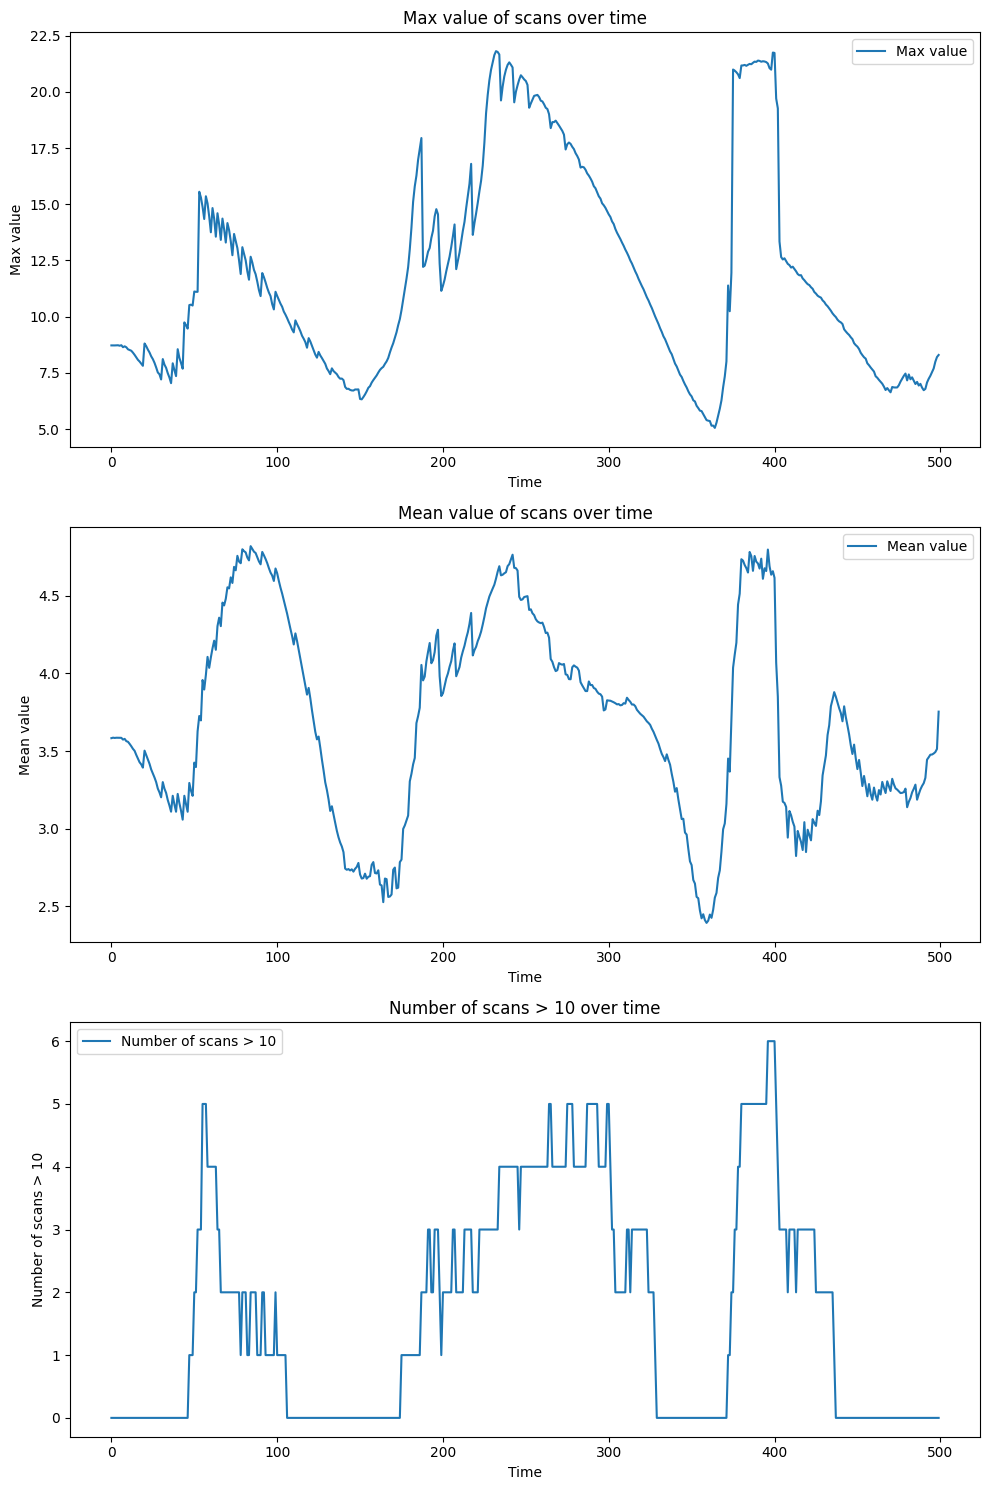

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df_sim = pd.read_csv('./F1TENTH__2023-12-19_16-33-08Recording1_winti_race_pp_50Hz_vel0.8_noise_c[0.0, 0.0].csv', comment='#')

# Select the first 200 rows
df_sim = df_sim.head(500)

state_keys = ['pose_x', 'pose_y', 'pose_theta', 'linear_vel_x', 'angular_vel_z', 'steering_angle']


lidar_keys =  ["LIDAR_{:04d}".format(i) for i in range(40, 1000, 25)]
print(lidar_keys)
scans = df_sim[lidar_keys].values


# Calculate the maximum value of each scan
max_values = scans.max(axis=1)
mean_values = scans.mean(axis=1)



# Create a new figure
# Calculate the number of scans > 10 for each row
num_scans_gt_10 = (scans > 10).sum(axis=1)

# Create a new subplot for the number of scans > 10
fig, axs = plt.subplots(3, figsize=(10, 15))

# Plot the maximum values in the first subplot
axs[0].plot(max_values, label='Max value')
axs[0].set_title('Max value of scans over time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Max value')
axs[0].legend()

# Plot the mean values in the second subplot
axs[1].plot(mean_values, label='Mean value')
axs[1].set_title('Mean value of scans over time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Mean value')
axs[1].legend()

# Plot the number of scans > 10 in the third subplot
axs[2].plot(num_scans_gt_10, label='Number of scans > 10')
axs[2].set_title('Number of scans > 10 over time')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Number of scans > 10')
axs[2].legend()

# Display the plot
plt.tight_layout()
plt.show()
